In [1]:
#필요한 라이브러리 불러오기
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium

In [2]:
#데이터 불러오기
과채류_원본 = pd.read_excel('D:/Programming/Jupyter/02.data/DS2_data/농산물데이터/채소생산량_과채류.xlsx')
근채류_원본 = pd.read_excel('D:/Programming/Jupyter/02.data/DS2_data/농산물데이터/채소생산량_근채류.xlsx')
엽채류_원본 = pd.read_excel('D:/Programming/Jupyter/02.data/DS2_data/농산물데이터/채소생산량_엽채류.xlsx')
조미채소_원본 = pd.read_excel('D:/Programming/Jupyter/02.data/DS2_data/농산물데이터/채소생산량_조미채소.xlsx')
과일_원본 = pd.read_excel('D:/Programming/Jupyter/02.data/DS2_data/농산물데이터/과실생산량.xlsx')

In [3]:
과채류_원본['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

In [4]:
과일_원본.dtypes

시도별                  object
시점                    int64
과일:면적 (ha)            int64
과일:생산량 (톤)            int64
사과:면적 (ha)            int64
사과:10a당 생산량 (kg)      int64
사과:생산량 (톤)            int64
배:면적 (ha)            object
배:10a당 생산량 (kg)      object
배:생산량 (톤)            object
복숭아:면적 (ha)          object
복숭아:10a당 생산량 (kg)    object
복숭아:생산량 (톤)          object
포도:면적 (ha)           object
포도:10a당 생산량 (kg)     object
포도:생산량 (톤)           object
감귤:면적 (ha)           object
감귤:10a당 생산량 (kg)     object
감귤:생산량 (톤)           object
감:면적 (ha)            object
감:10a당 생산량 (kg)      object
감:생산량 (톤)            object
자두:면적 (ha)           object
자두:10a당 생산량 (kg)     object
자두:생산량 (톤)           object
매실:면적 (ha)           object
매실:10a당 생산량 (kg)     object
매실:생산량 (톤)           object
dtype: object

In [5]:
# 시도별 및 시점 열을 제외한 열들을 선택
열_선택 = 과일_원본.columns[2:]  # 시도별과 시점을 제외한 모든 열 선택

# 선택한 열을 int64 형으로 변환
과일_원본[열_선택] = 과일_원본[열_선택].replace('-', 0).astype('int64')


In [6]:
과일_원본.dtypes

시도별                  object
시점                    int64
과일:면적 (ha)            int64
과일:생산량 (톤)            int64
사과:면적 (ha)            int64
사과:10a당 생산량 (kg)      int64
사과:생산량 (톤)            int64
배:면적 (ha)             int64
배:10a당 생산량 (kg)       int64
배:생산량 (톤)             int64
복숭아:면적 (ha)           int64
복숭아:10a당 생산량 (kg)     int64
복숭아:생산량 (톤)           int64
포도:면적 (ha)            int64
포도:10a당 생산량 (kg)      int64
포도:생산량 (톤)            int64
감귤:면적 (ha)            int64
감귤:10a당 생산량 (kg)      int64
감귤:생산량 (톤)            int64
감:면적 (ha)             int64
감:10a당 생산량 (kg)       int64
감:생산량 (톤)             int64
자두:면적 (ha)            int64
자두:10a당 생산량 (kg)      int64
자두:생산량 (톤)            int64
매실:면적 (ha)            int64
매실:10a당 생산량 (kg)      int64
매실:생산량 (톤)            int64
dtype: object

In [7]:
# 중간 결과 저장
과채류 = 과채류_원본.copy()
근채류 = 근채류_원본.copy()
엽채류 = 엽채류_원본.copy()
조미채소 = 조미채소_원본.copy()
과일 = 과일_원본.copy()

<h2>0. 문제 파악 - 농작물 총 변화량 살펴보기 (생산량, 면적)</h2>

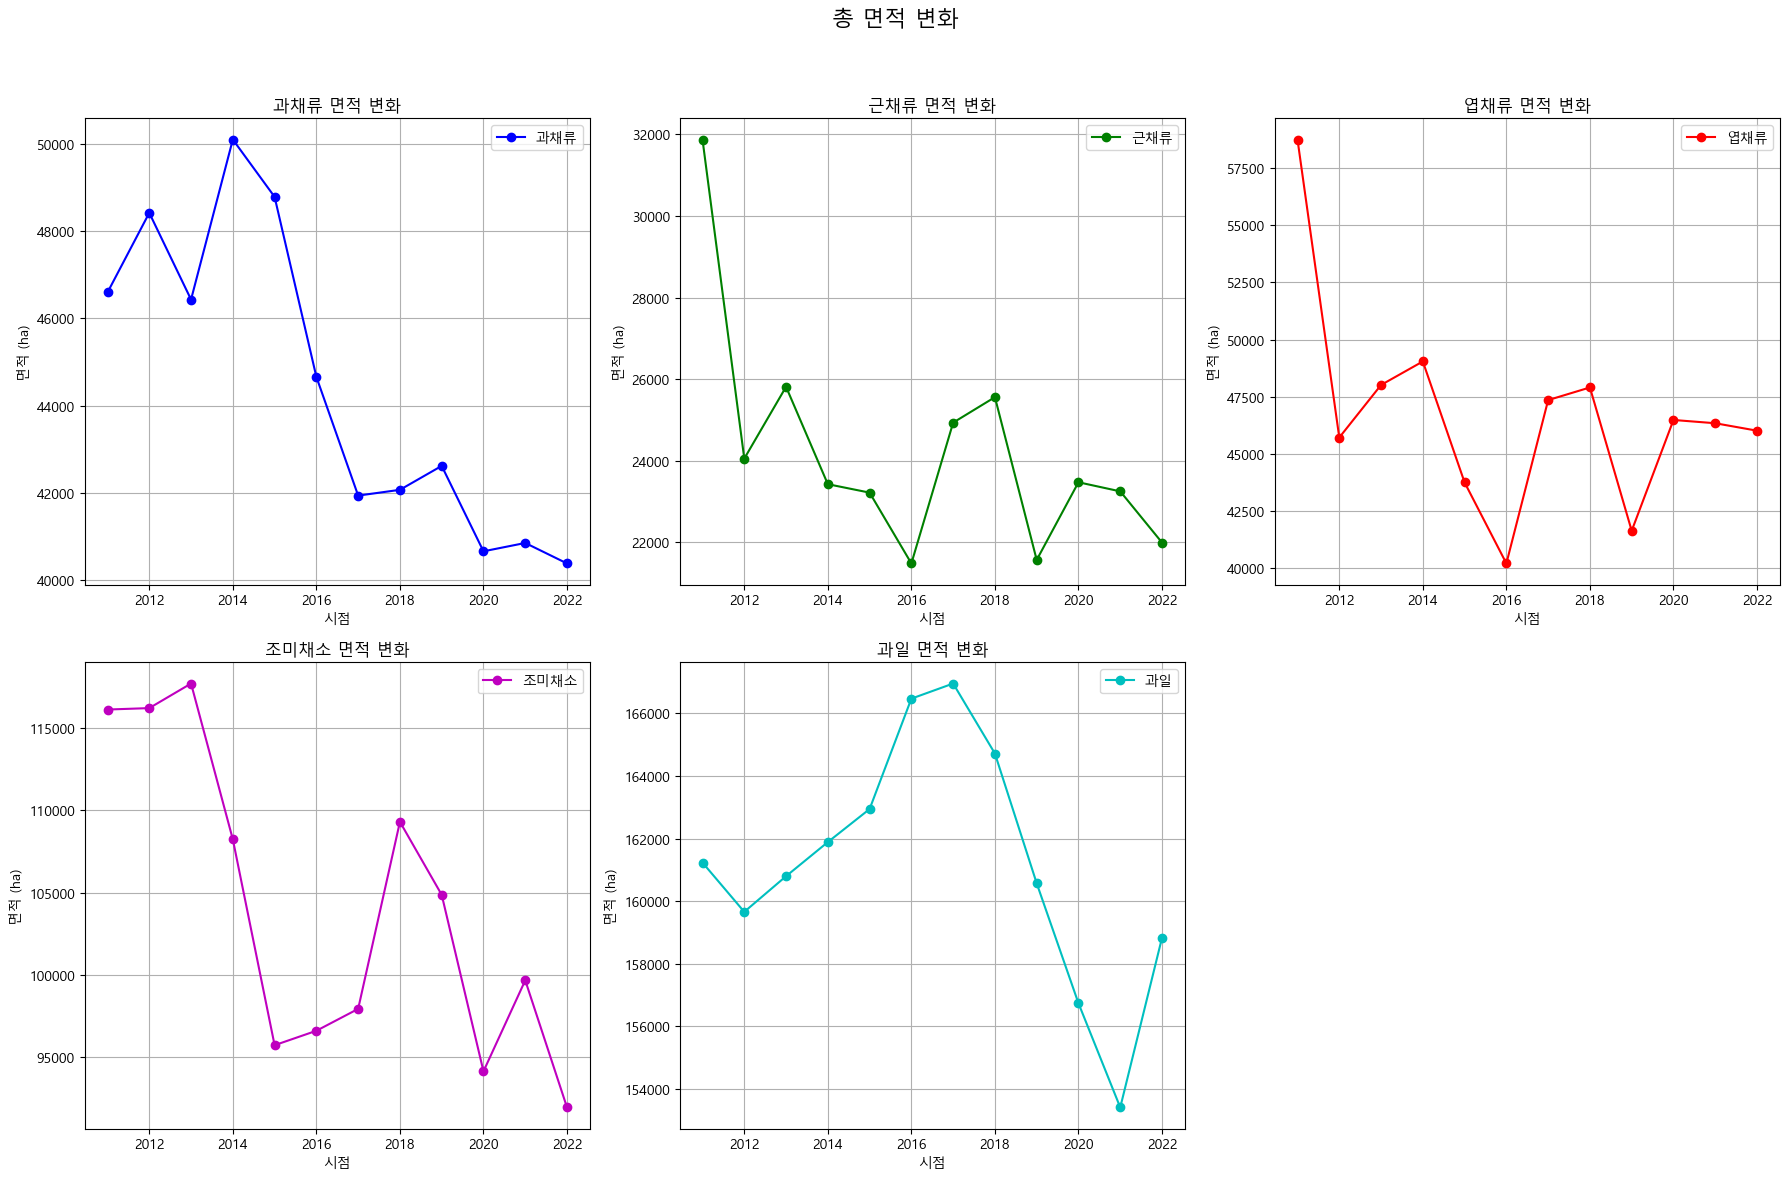

In [8]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 캐시 지우기
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False


# 그래프 설정
plt.figure(figsize=(18, 12))
plt.suptitle('총 면적 변화', fontsize=16)

categories = ['과채류', '근채류', '엽채류', '조미채소', '과일']
colors = ['b', 'g', 'r', 'm', 'c']  # 각 카테고리에 대한 선색 설정

for i, category in enumerate(categories, 1):
    plt.subplot(2, 3, i)
    시점별_면적합계 = globals()[category].groupby('시점')[f'{category}:면적 (ha)'].sum().reset_index()
    plt.plot(시점별_면적합계['시점'], 시점별_면적합계[f'{category}:면적 (ha)'], marker='o', linestyle='-', color=colors[i-1], label=category)
    plt.title(f'{category} 면적 변화')
    plt.xlabel('시점')
    plt.ylabel('면적 (ha)')
    plt.grid(True)  # 그리드 추가
    plt.legend(loc='best')  # 범례 위치 설정

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 표시
plt.show()

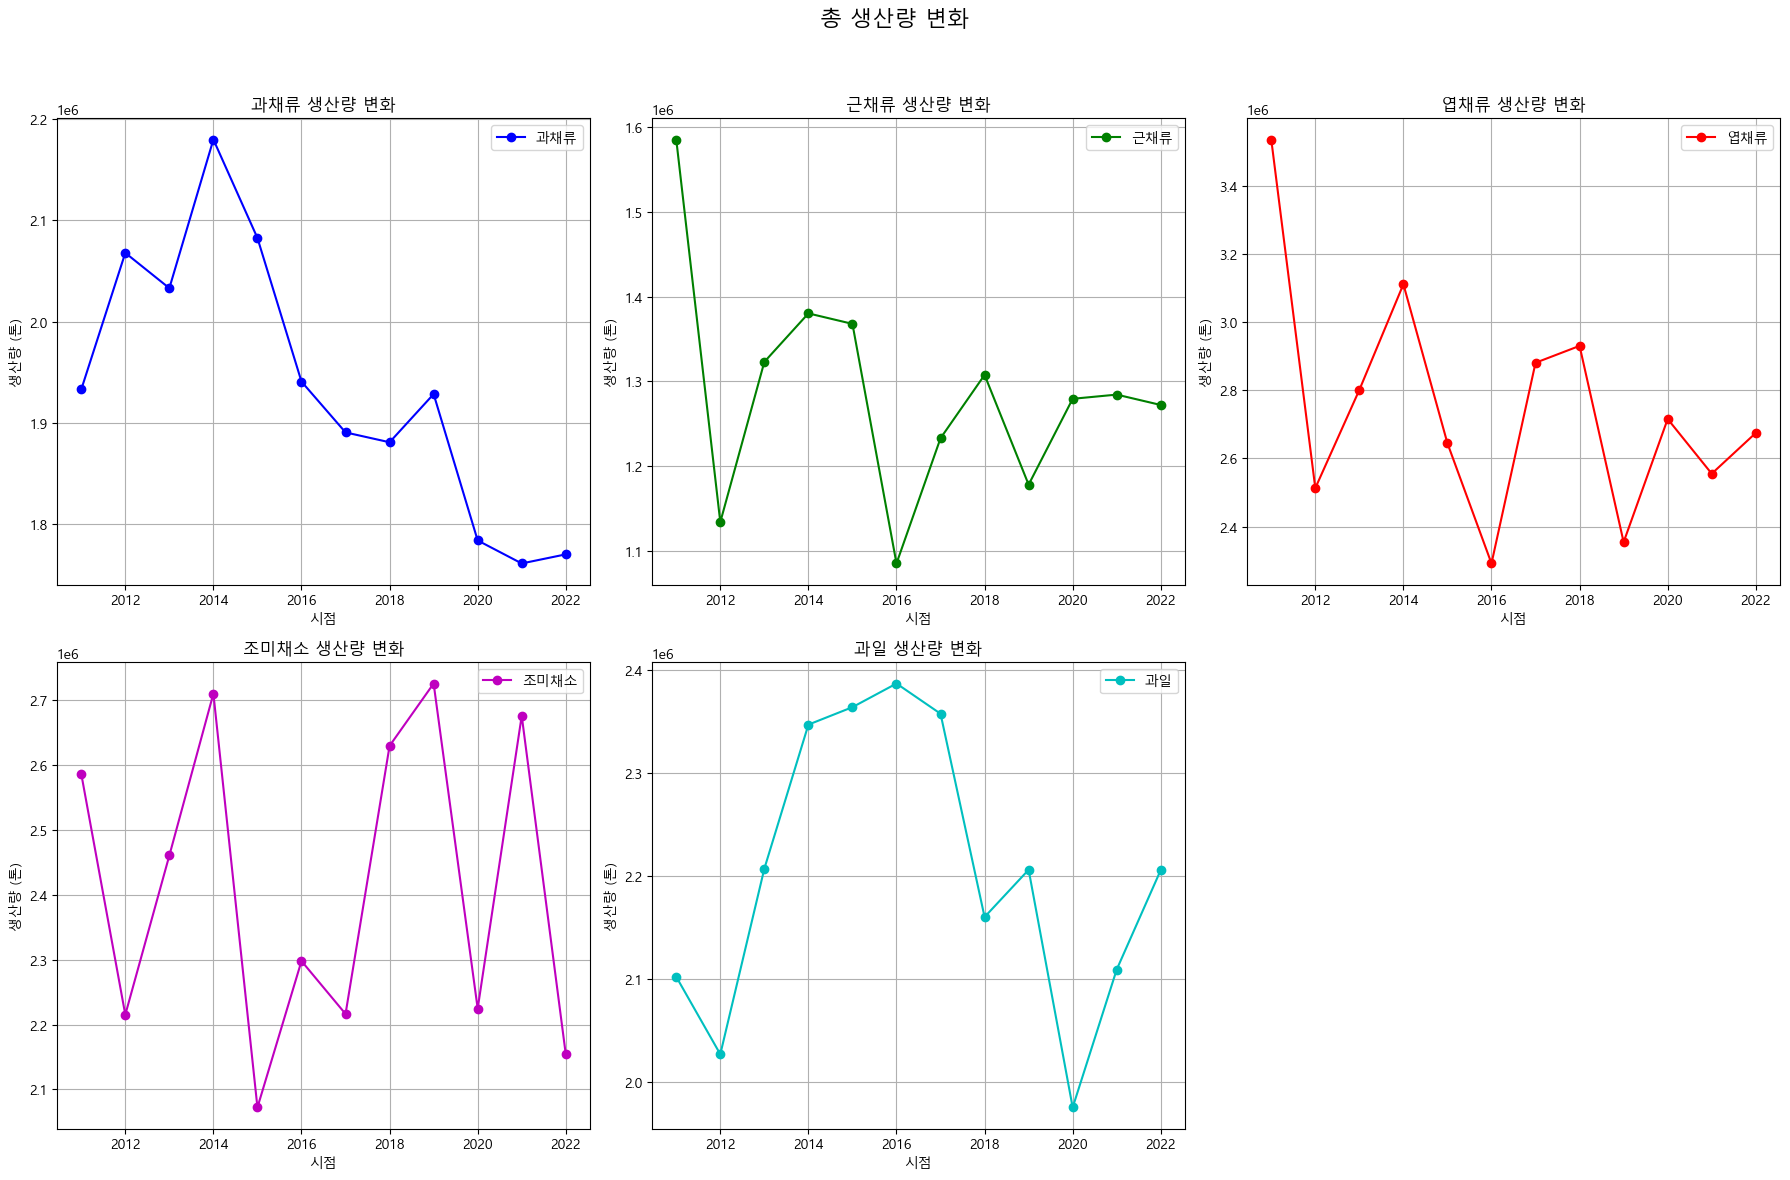

In [9]:
# 그래프 설정
plt.figure(figsize=(18, 12))
plt.suptitle('총 생산량 변화', fontsize=16)

# 색상 설정
colors = ['b', 'g', 'r', 'm', 'c']
categories = ['과채류', '근채류', '엽채류', '조미채소', '과일']

for i, category in enumerate(categories, 1):
    plt.subplot(2, 3, i)
    시점별_생산량합계 = globals()[category].groupby('시점')[f'{category}:생산량 (톤)'].sum().reset_index()
    plt.plot(시점별_생산량합계['시점'], 시점별_생산량합계[f'{category}:생산량 (톤)'], marker='o', label=category, color=colors[i-1])
    plt.title(f'{category} 생산량 변화')
    plt.xlabel('시점')
    plt.ylabel('생산량 (톤)')
    plt.grid(True)  # 그리드 추가
    plt.legend(loc='best')  # 범례 위치 설정

# 그래프 간 간격 조절
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 그래프 표시
plt.show()

<h2> 1. 농작물 분석</h2>

<h2> 1. 각 채소별 분석 </h2>

In [10]:
과채류.drop(columns=["과채류:면적 (ha)", "과채류:생산량 (톤)"], inplace=True)
엽채류.drop(columns=["엽채류:면적 (ha)", "엽채류:생산량 (톤)"], inplace=True)
근채류.drop(columns=["근채류:면적 (ha)", "근채류:생산량 (톤)"], inplace=True)
조미채소.drop(columns=["조미채소:면적 (ha)", "조미채소:생산량 (톤)"], inplace=True)
과일.drop(columns=["과일:면적 (ha)", "과일:생산량 (톤)"], inplace=True)

In [11]:
#채소 데이터 합치기
merged_data = pd.merge(과채류, 엽채류, on=['시도별', '시점'])
merged_data = pd.merge(merged_data, 근채류, on=['시도별', '시점'])
merged_data= pd.merge(merged_data, 조미채소, on=['시도별', '시점'])

In [12]:
채소 = merged_data

In [13]:
과일

,시도별,시점,사과:면적 (ha),사과:10a당 생산량 (kg),사과:생산량 (톤),배:면적 (ha),배:10a당 생산량 (kg),배:생산량 (톤),복숭아:면적 (ha),복숭아:10a당 생산량 (kg),...,감귤:생산량 (톤),감:면적 (ha),감:10a당 생산량 (kg),감:생산량 (톤),자두:면적 (ha),자두:10a당 생산량 (kg),자두:생산량 (톤),매실:면적 (ha),매실:10a당 생산량 (kg),매실:생산량 (톤)
0,서울특별시,2011,0,0,0,3,0,0,1,0,...,0,1,0,0,4,0,0,0,0,0
1,서울특별시,2012,0,0,0,24,1564,375,1,1100,...,0,6,0,0,0,0,0,0,0,0
2,서울특별시,2013,0,0,0,24,1774,426,1,0,...,0,5,0,0,0,0,0,0,0,0
3,서울특별시,2014,0,0,0,24,1922,461,0,0,...,0,2,0,0,0,0,0,0,0,0
4,서울특별시,2015,0,0,0,24,2072,497,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,제주도,2018,0,750,1,0,2247,9,2,977,...,619761,144,458,660,0,0,0,0,0,0
196,제주도,2019,0,60,0,1,2071,11,23,17,...,628937,137,272,373,0,0,0,141,505,712
197,제주도,2020,1,0,0,0,1197,6,19,16,...,658038,136,232,315,0,0,0,143,532,761
198,제주도,2021,0,0,0,0,0,0,0,427,...,634487,27,460,124,6,143,8,57,547,314


In [14]:
#연도별 합계
merged_계 = merged_data.groupby('시점').sum().reset_index()
과일_계 = 과일.groupby('시점').sum().reset_index()

C:\Users\suin\AppData\Local\Temp\ipykernel_7376\2056450476.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_계 = merged_data.groupby('시점').sum().reset_index()
C:\Users\suin\AppData\Local\Temp\ipykernel_7376\2056450476.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  과일_계 = 과일.groupby('시점').sum().reset_index()


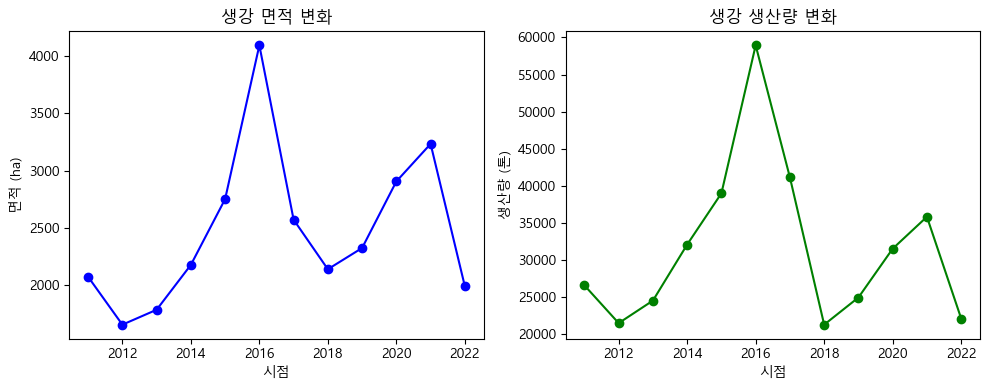

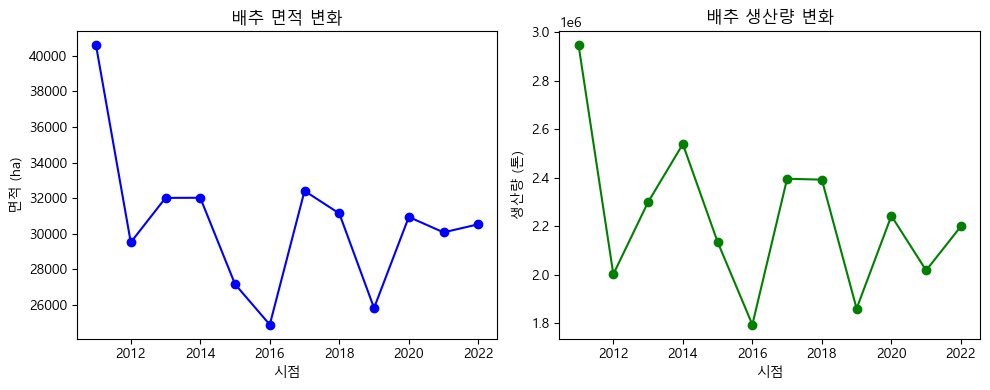

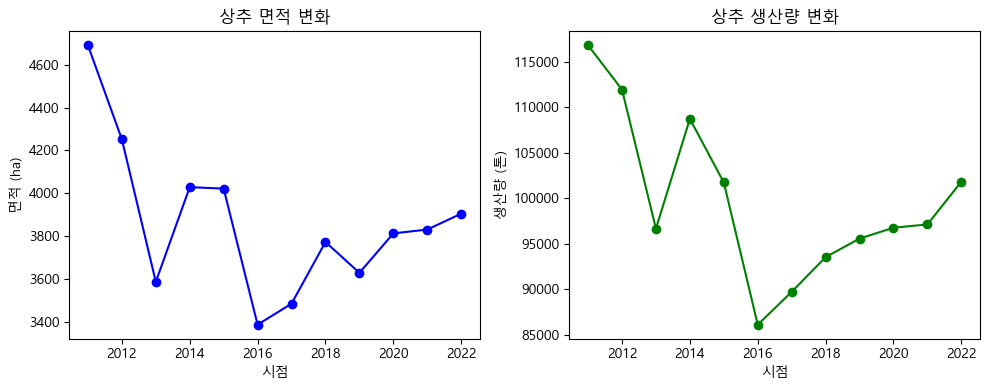

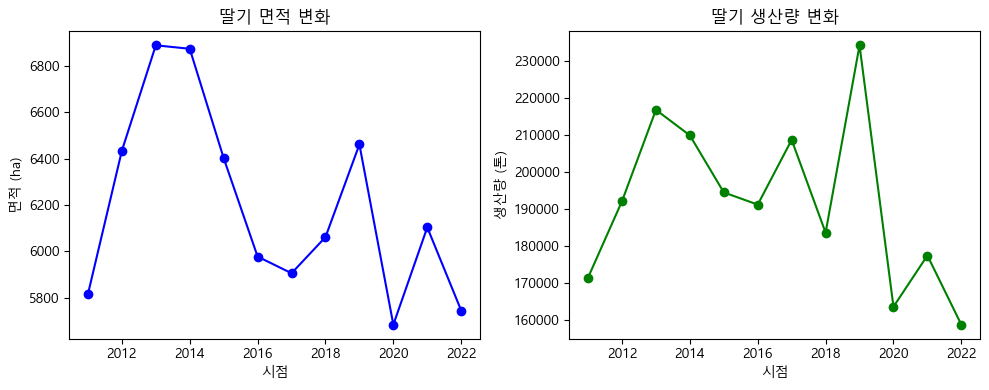

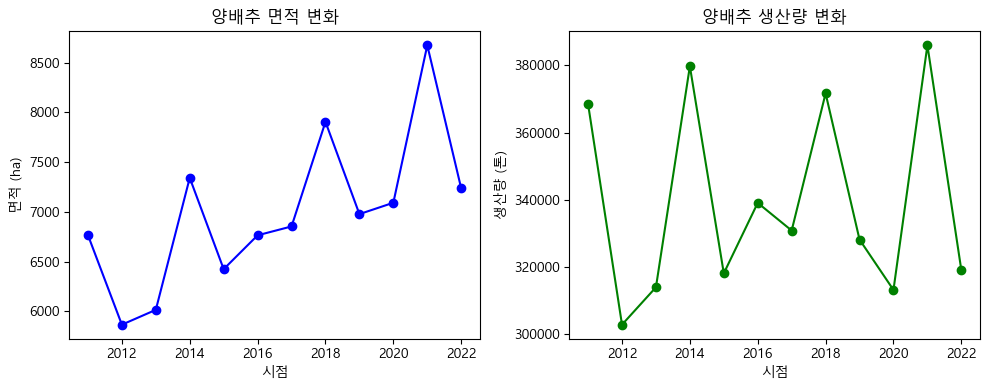

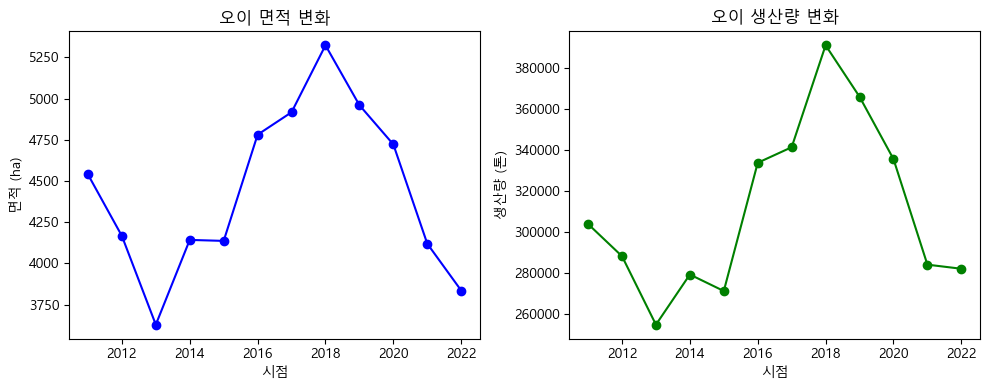

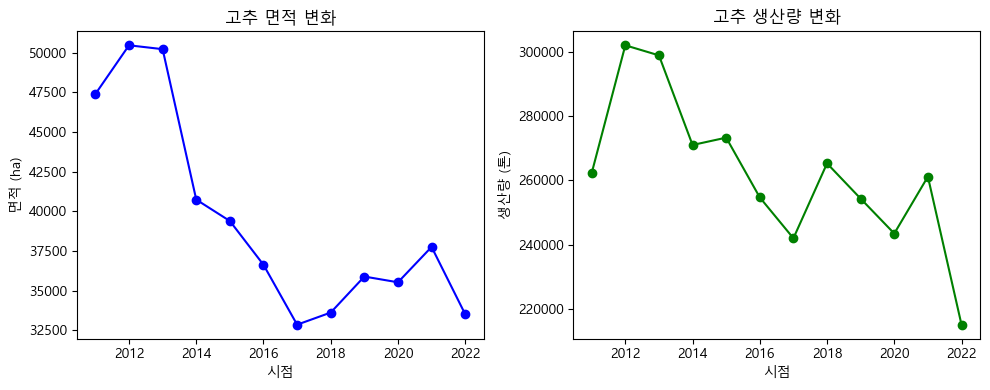

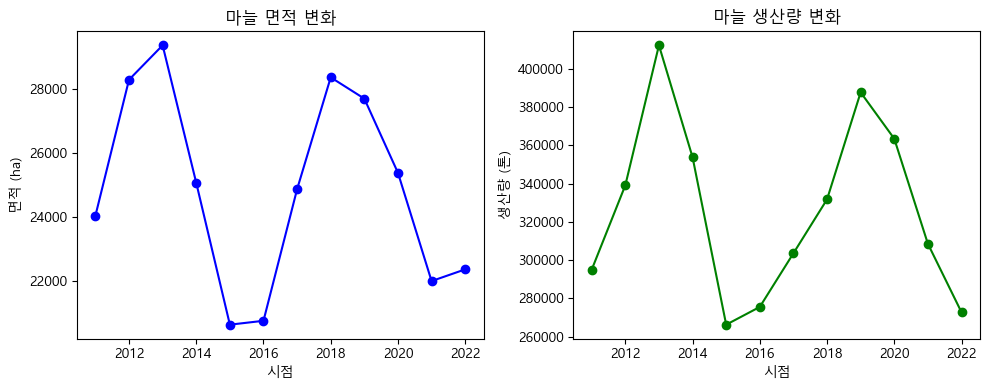

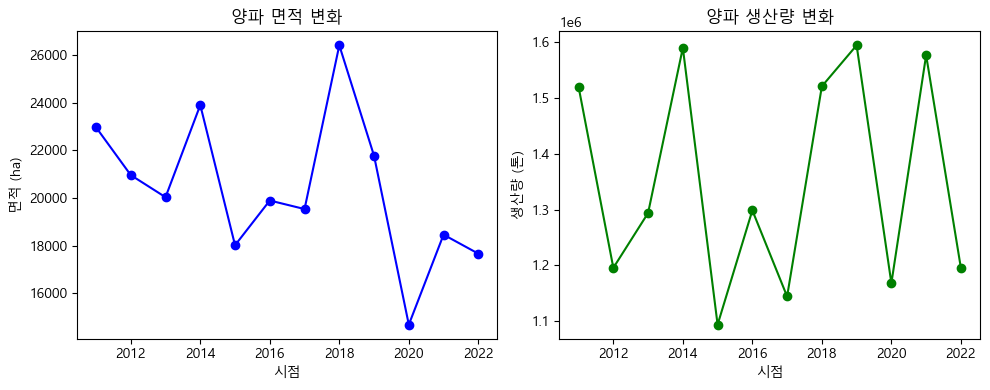

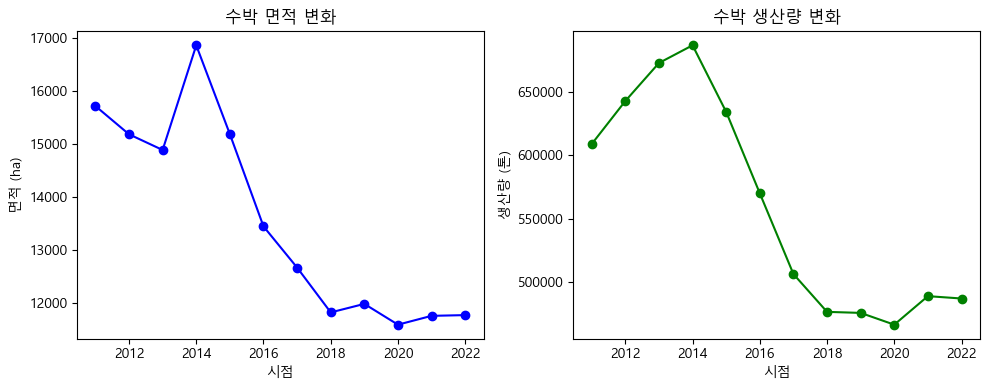

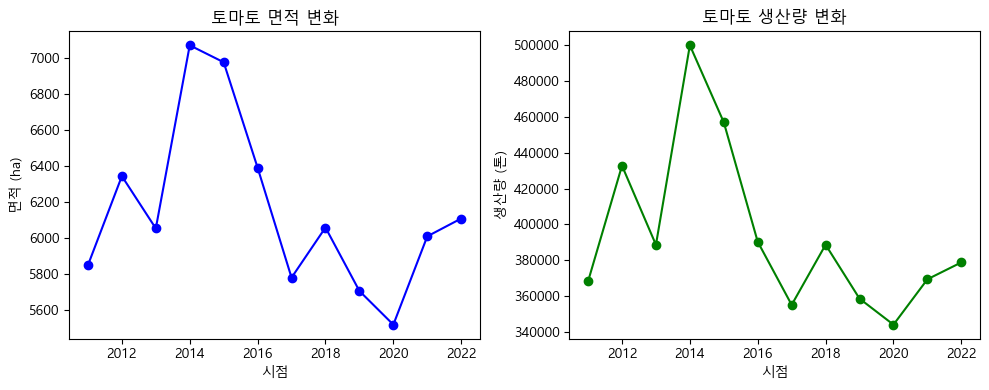

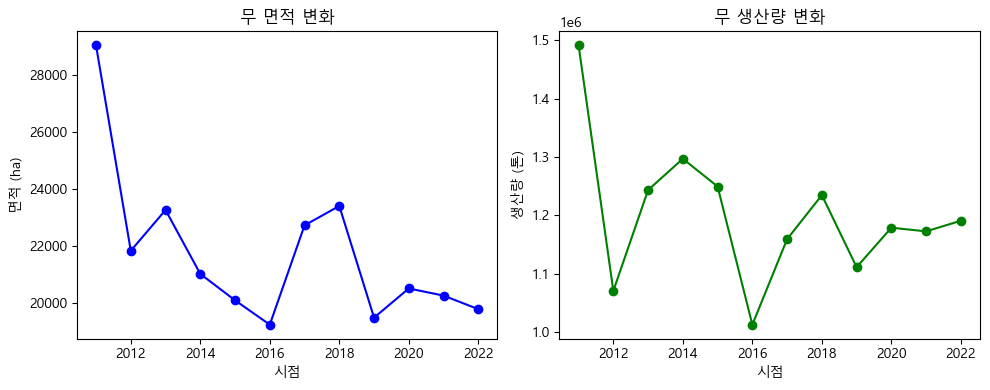

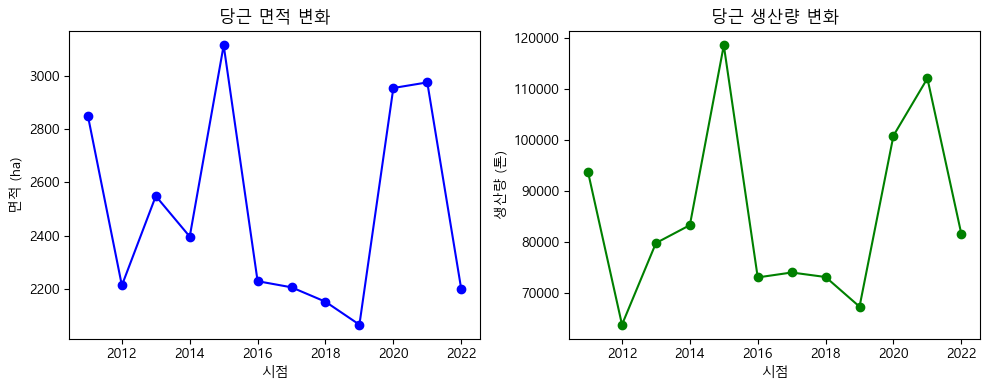

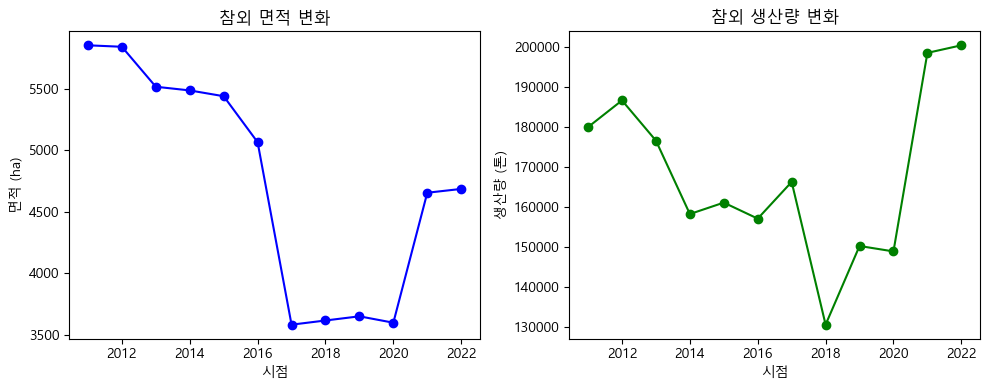

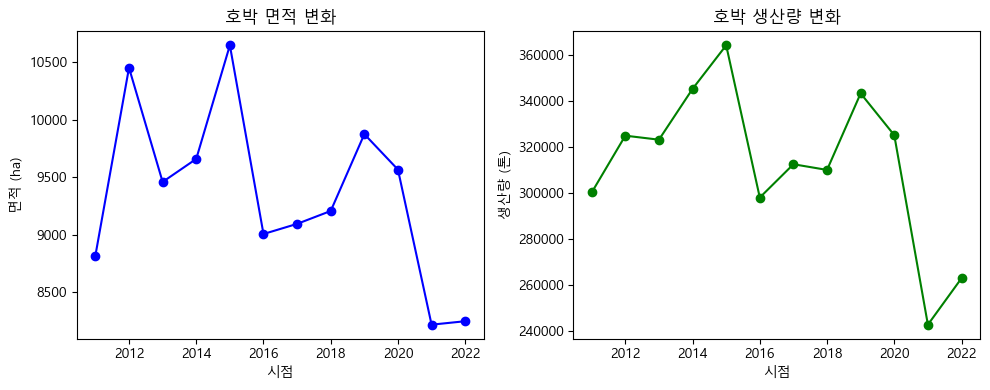

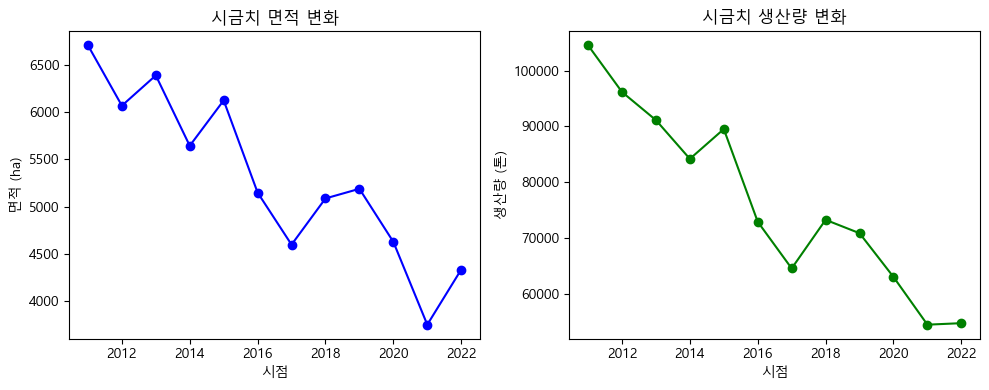

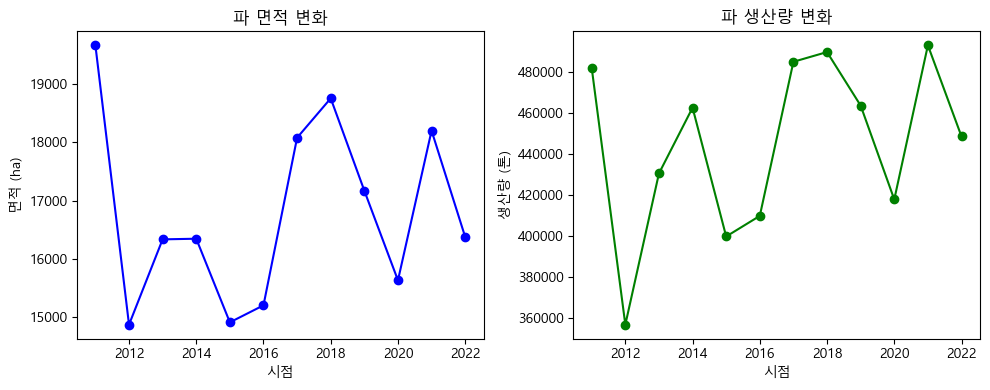

In [15]:
#농산물 각각 변화량 시각화

# 야채 이름을 추출하여 리스트로 만듭니다.
vegetables = [col.split(':')[0] for col in merged_계.columns if ':' in col]

# 중복된 야채 이름을 제거합니다.
vegetables = list(set(vegetables))

# 각 채소에 대한 면적 및 생산량 비교
for vegetable in vegetables:
    area_column = f'{vegetable}:면적 (ha)'
    production_column = f'{vegetable}:생산량 (톤)'
    
    # 그래프 생성 및 표시
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(merged_계['시점'], merged_계[area_column], marker='o', linestyle='-', color='b')
    plt.title(f'{vegetable} 면적 변화')
    plt.xlabel('시점')
    plt.ylabel('면적 (ha)')
    
    plt.subplot(1, 2, 2)
    plt.plot(merged_계['시점'], merged_계[production_column], marker='o', linestyle='-', color='g')
    plt.title(f'{vegetable} 생산량 변화')
    plt.xlabel('시점')
    plt.ylabel('생산량 (톤)')
    
    plt.tight_layout()
    plt.show()


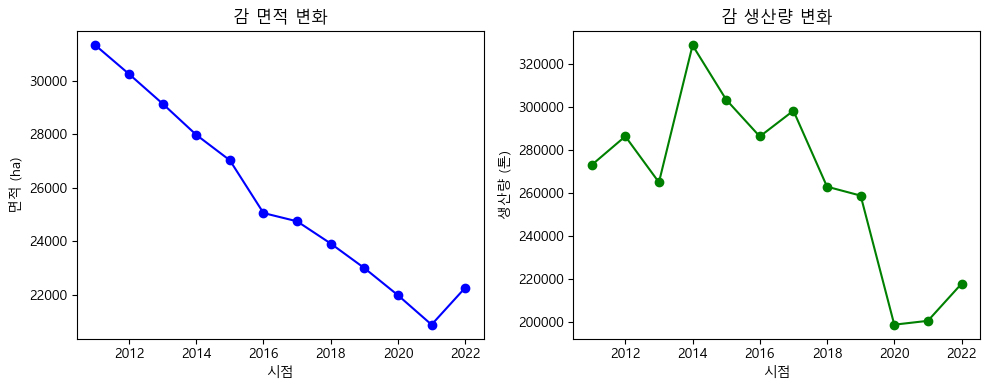

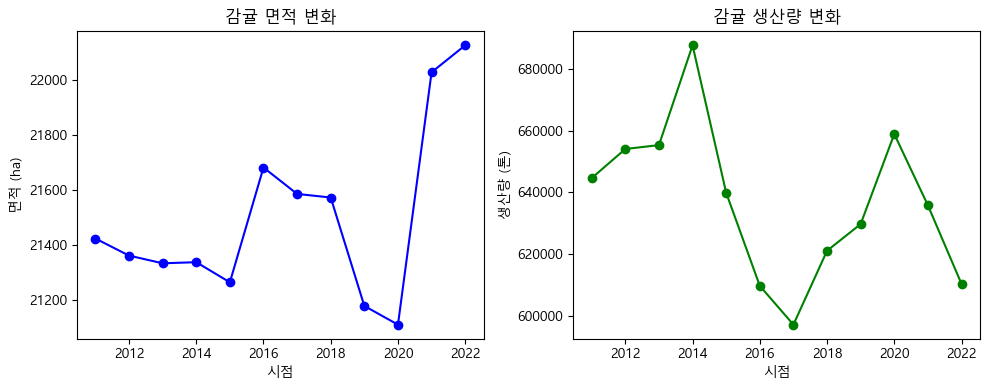

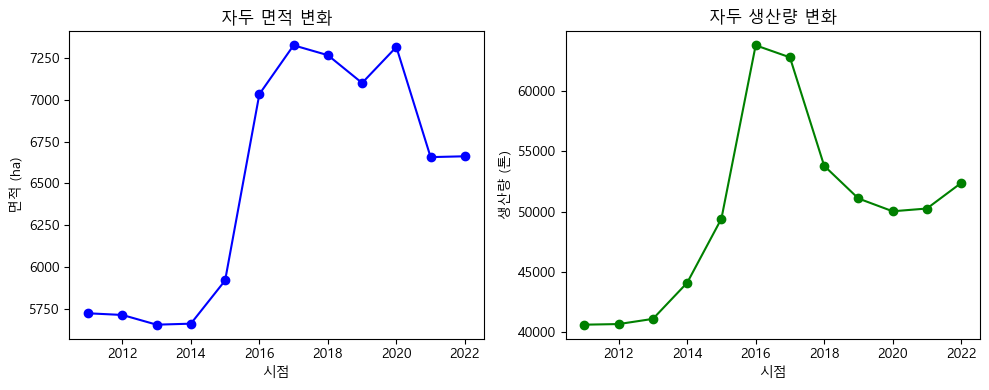

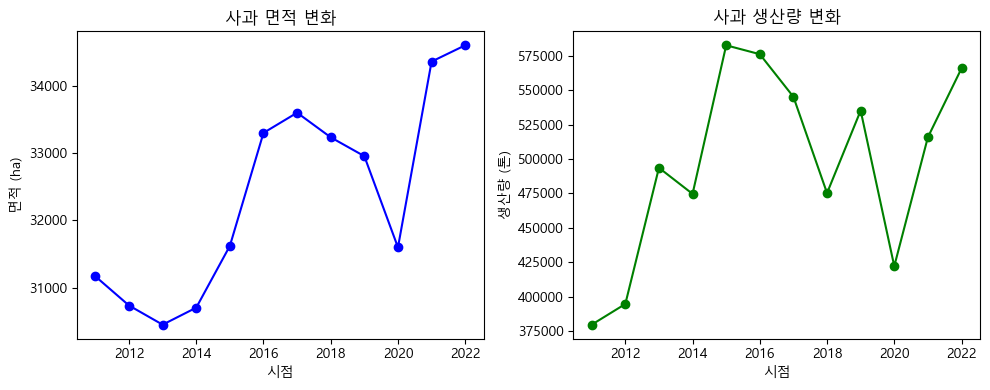

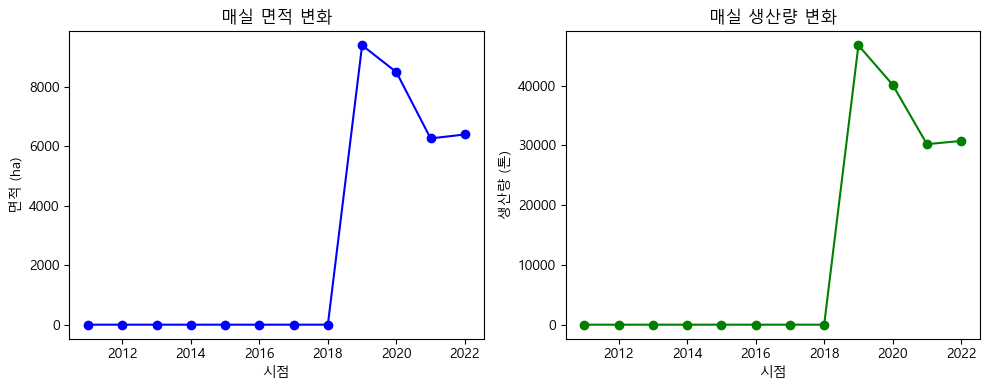

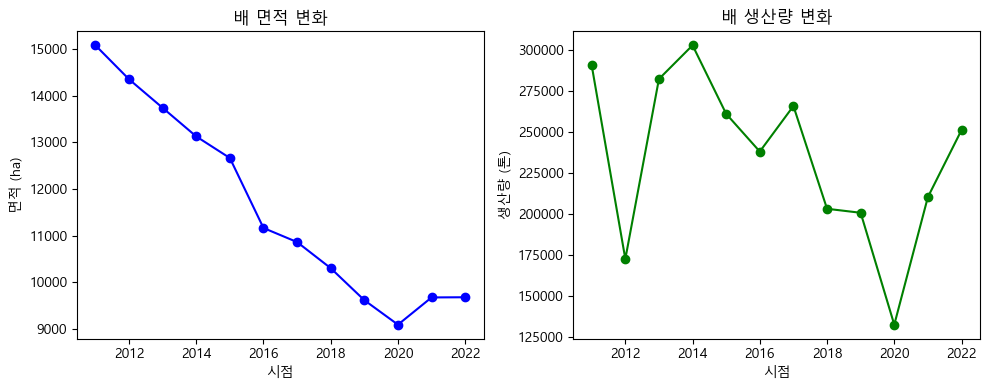

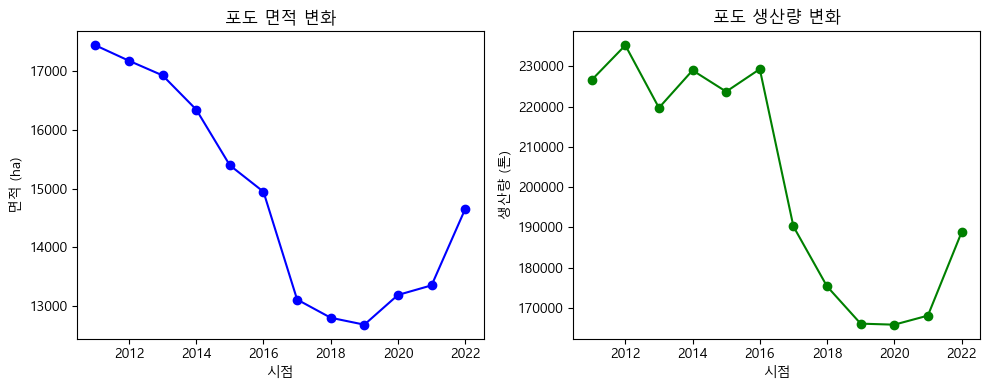

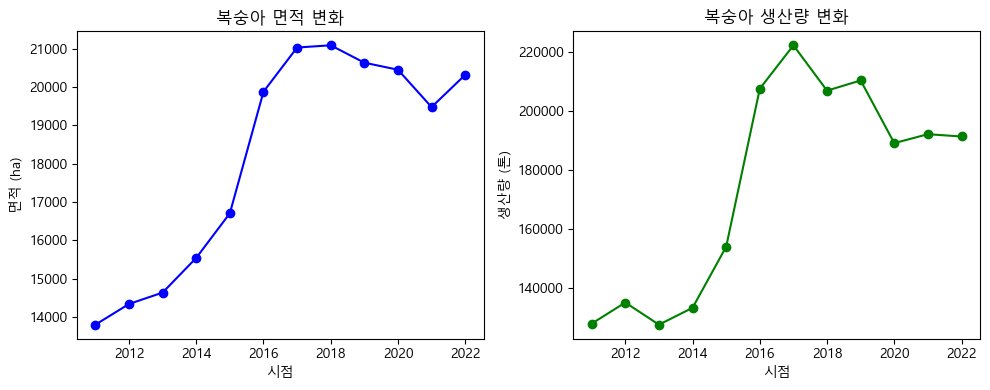

In [16]:
#과일

# 과일 이름을 추출하여 리스트로 만듭니다.
fruits = [col.split(':')[0] for col in 과일_계.columns if ':' in col]

# 중복된 과일 이름을 제거합니다.
fruits = list(set(fruits))

# 각 과일에 대한 면적 및 생산량 비교
for fruit in fruits:
    area_column = f'{fruit}:면적 (ha)'
    production_column = f'{fruit}:생산량 (톤)'
    
    # 그래프 생성 및 표시
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(과일_계['시점'], 과일_계[area_column], marker='o', linestyle='-', color='b')
    plt.title(f'{fruit} 면적 변화')
    plt.xlabel('시점')
    plt.ylabel('면적 (ha)')
    
    plt.subplot(1, 2, 2)
    plt.plot(과일_계['시점'], 과일_계[production_column], marker='o', linestyle='-', color='g')
    plt.title(f'{fruit} 생산량 변화')
    plt.xlabel('시점')
    plt.ylabel('생산량 (톤)')
    
    plt.tight_layout()
    plt.show()

# 1.1 (위) 변화량 순위

In [17]:
# 2011년과 2022년의 생산량을 저장할 딕셔너리
production_changes = {}

for vegetable in vegetables:
    # 2011년과 2022년의 생산량
    production_2011 = merged_계[f'{vegetable}:생산량 (톤)'][merged_계['시점'] == 2011].values[0]
    production_2022 = merged_계[f'{vegetable}:생산량 (톤)'][merged_계['시점'] == 2022].values[0]

    # 변화 계산
    change = production_2022 - production_2011

    # 생산량이 감소했는지 여부 확인
    is_decrease = change < 0

    # 딕셔너리에 저장
    production_changes[vegetable] = {'변화량': change, '감소여부': is_decrease}

# 변화량을 기준으로 정렬하여 순위 계산
ranked_vegetables = sorted(production_changes, key=lambda k: production_changes[k]['변화량'])

# 순위, 감소량 및 감소 여부 출력
for rank, vegetable in enumerate(ranked_vegetables, start=1):
    change_info = production_changes[vegetable]
    decrease_status = '감소' if change_info['감소여부'] else '증가'
    print(f'순위 {rank}: {vegetable} (채소생산 변화량: {change_info["변화량"]} 톤, {decrease_status})')


순위 1: 배추 (채소생산 변화량: -747437 톤, 감소)
순위 2: 양파 (채소생산 변화량: -324453 톤, 감소)
순위 3: 무 (채소생산 변화량: -301137 톤, 감소)
순위 4: 수박 (채소생산 변화량: -121819 톤, 감소)
순위 5: 시금치 (채소생산 변화량: -49817 톤, 감소)
순위 6: 양배추 (채소생산 변화량: -49363 톤, 감소)
순위 7: 고추 (채소생산 변화량: -47207 톤, 감소)
순위 8: 호박 (채소생산 변화량: -37301 톤, 감소)
순위 9: 파 (채소생산 변화량: -33511 톤, 감소)
순위 10: 마늘 (채소생산 변화량: -22242 톤, 감소)
순위 11: 오이 (채소생산 변화량: -21879 톤, 감소)
순위 12: 상추 (채소생산 변화량: -14977 톤, 감소)
순위 13: 딸기 (채소생산 변화량: -12712 톤, 감소)
순위 14: 당근 (채소생산 변화량: -12106 톤, 감소)
순위 15: 생강 (채소생산 변화량: -4466 톤, 감소)
순위 16: 토마토 (채소생산 변화량: 10584 톤, 증가)
순위 17: 참외 (채소생산 변화량: 20482 톤, 증가)


In [18]:
# 2011년과 2022년의 면적 변화를 저장할 딕셔너리
area_changes = {}

for vegetable in vegetables:
    # 2011년과 2022년의 면적
    area_2011 = merged_계[f'{vegetable}:면적 (ha)'][merged_계['시점'] == 2011].values[0]
    area_2022 = merged_계[f'{vegetable}:면적 (ha)'][merged_계['시점'] == 2022].values[0]

    # 변화 계산
    change = area_2022 - area_2011

    # 면적이 감소했는지 여부 확인
    is_decrease = change < 0

    # 딕셔너리에 저장
    area_changes[vegetable] = {'변화량': change, '감소여부': is_decrease}

# 면적 변화량을 기준으로 정렬하여 순위 계산
ranked_vegetables_area = sorted(area_changes, key=lambda k: area_changes[k]['변화량'])

# 순위, 감소량 및 감소 여부 출력
for rank, vegetable in enumerate(ranked_vegetables_area, start=1):
    change_info = area_changes[vegetable]
    decrease_status = '감소' if change_info['감소여부'] else '증가'
    print(f'면적 변화 순위 {rank}: {vegetable} (면적 변화량: {change_info["변화량"]} ha, {decrease_status})')


면적 변화 순위 1: 고추 (면적 변화량: -13864 ha, 감소)
면적 변화 순위 2: 배추 (면적 변화량: -10049 ha, 감소)
면적 변화 순위 3: 무 (면적 변화량: -9225 ha, 감소)
면적 변화 순위 4: 양파 (면적 변화량: -5315 ha, 감소)
면적 변화 순위 5: 수박 (면적 변화량: -3955 ha, 감소)
면적 변화 순위 6: 파 (면적 변화량: -3289 ha, 감소)
면적 변화 순위 7: 시금치 (면적 변화량: -2377 ha, 감소)
면적 변화 순위 8: 마늘 (면적 변화량: -1672 ha, 감소)
면적 변화 순위 9: 참외 (면적 변화량: -1168 ha, 감소)
면적 변화 순위 10: 상추 (면적 변화량: -786 ha, 감소)
면적 변화 순위 11: 오이 (면적 변화량: -704 ha, 감소)
면적 변화 순위 12: 당근 (면적 변화량: -648 ha, 감소)
면적 변화 순위 13: 호박 (면적 변화량: -570 ha, 감소)
면적 변화 순위 14: 생강 (면적 변화량: -82 ha, 감소)
면적 변화 순위 15: 딸기 (면적 변화량: -71 ha, 감소)
면적 변화 순위 16: 토마토 (면적 변화량: 259 ha, 증가)
면적 변화 순위 17: 양배추 (면적 변화량: 469 ha, 증가)


In [19]:
# 2011년과 2022년의 생산량을 저장할 딕셔너리
fruit_production_changes = {}

for fruit in fruits:
    # 2011년과 2022년의 생산량
    production_2011 = 과일_계[f'{fruit}:생산량 (톤)'][과일_계['시점'] == 2011].values[0]
    production_2022 = 과일_계[f'{fruit}:생산량 (톤)'][과일_계['시점'] == 2022].values[0]

    # 변화 계산
    change = production_2022 - production_2011

    # 생산량이 감소했는지 여부 확인
    is_decrease = change < 0

    # 딕셔너리에 저장
    fruit_production_changes[fruit] = {'변화량': change, '감소여부': is_decrease}

# 변화량을 기준으로 정렬하여 순위 계산
ranked_fruits = sorted(fruit_production_changes, key=lambda k: fruit_production_changes[k]['변화량'])

# 순위, 감소량 및 감소 여부 출력
for rank, fruit in enumerate(ranked_fruits, start=1):
    change_info = fruit_production_changes[fruit]
    decrease_status = '감소' if change_info['감소여부'] else '증가'
    print(f'순위 {rank}: {fruit} (과일생산 변화량: {change_info["변화량"]} 톤, {decrease_status})')


순위 1: 감 (과일생산 변화량: -55274 톤, 감소)
순위 2: 배 (과일생산 변화량: -39401 톤, 감소)
순위 3: 포도 (과일생산 변화량: -37819 톤, 감소)
순위 4: 감귤 (과일생산 변화량: -34177 톤, 감소)
순위 5: 자두 (과일생산 변화량: 11738 톤, 증가)
순위 6: 매실 (과일생산 변화량: 30727 톤, 증가)
순위 7: 복숭아 (과일생산 변화량: 63554 톤, 증가)
순위 8: 사과 (과일생산 변화량: 186500 톤, 증가)


In [20]:
# 2011년과 2022년의 면적 변화를 저장할 딕셔너리
fruit_area_changes = {}

for fruit in fruits:
    # 2011년과 2022년의 면적
    area_2011 = 과일_계[f'{fruit}:면적 (ha)'][과일_계['시점'] == 2011].values[0]
    area_2022 = 과일_계[f'{fruit}:면적 (ha)'][과일_계['시점'] == 2022].values[0]

    # 변화 계산
    change = area_2022 - area_2011

    # 면적이 감소했는지 여부 확인
    is_decrease = change < 0

    # 딕셔너리에 저장
    fruit_area_changes[fruit] = {'변화량': change, '감소여부': is_decrease}

# 면적 변화량을 기준으로 정렬하여 순위 계산
ranked_fruits_area = sorted(fruit_area_changes, key=lambda k: fruit_area_changes[k]['변화량'])

# 순위, 감소량 및 감소 여부 출력
for rank, fruit in enumerate(ranked_fruits_area, start=1):
    change_info = fruit_area_changes[fruit]
    decrease_status = '감소' if change_info['감소여부'] else '증가'
    print(f'과일 면적 변화 순위 {rank}: {fruit} (면적 변화량: {change_info["변화량"]} ha, {decrease_status})')


과일 면적 변화 순위 1: 감 (면적 변화량: -9075 ha, 감소)
과일 면적 변화 순위 2: 배 (면적 변화량: -5402 ha, 감소)
과일 면적 변화 순위 3: 포도 (면적 변화량: -2793 ha, 감소)
과일 면적 변화 순위 4: 감귤 (면적 변화량: 702 ha, 증가)
과일 면적 변화 순위 5: 자두 (면적 변화량: 938 ha, 증가)
과일 면적 변화 순위 6: 사과 (면적 변화량: 3435 ha, 증가)
과일 면적 변화 순위 7: 매실 (면적 변화량: 6391 ha, 증가)
과일 면적 변화 순위 8: 복숭아 (면적 변화량: 6522 ha, 증가)


In [21]:
# "채소" 데이터프레임에서 "시도별" 열의 고유한 값 확인
고유한_지역 = 채소['시도별'].unique()

고유한_지역

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도'], dtype=object)

# 지도

In [22]:
# 구글맵을 이용한 위도, 경도 알아내기

import requests

# Google Maps Geocoding API의 엔드포인트와 API 키를 설정합니다.
endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'
api_key = '여기에 발급받은 API 키 입력'

# 경도와 위도 정보를 가져올 지역명을 리스트로 정의합니다.
locations = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주도']

# 각 지역의 경도와 위도 정보를 저장할 리스트를 초기화합니다.
latitudes = []
longitudes = []

# 각 지역명에 대해 경도와 위도 정보를 가져옵니다.
for location in locations:
    params = {
        'address': location,
        'key': api_key
    }
    response = requests.get(endpoint, params=params)
    data = response.json()
    if data['status'] == 'OK':
        lat = data['results'][0]['geometry']['location']['lat']
        lng = data['results'][0]['geometry']['location']['lng']
        latitudes.append(lat)
        longitudes.append(lng)
    else:
        print(f"Failed to geocode {location}")

# 결과 출력
for i in range(len(locations)):
    print(f"{locations[i]} - 경도: {longitudes[i]}, 위도: {latitudes[i]}")


Failed to geocode 서울특별시
Failed to geocode 부산광역시
Failed to geocode 대구광역시
Failed to geocode 인천광역시
Failed to geocode 광주광역시
Failed to geocode 대전광역시
Failed to geocode 울산광역시
Failed to geocode 세종특별자치시
Failed to geocode 경기도
Failed to geocode 강원도
Failed to geocode 충청북도
Failed to geocode 충청남도
Failed to geocode 전라북도
Failed to geocode 전라남도
Failed to geocode 경상북도
Failed to geocode 경상남도
Failed to geocode 제주도


IndexError: list index out of range

In [23]:
#위에서 알아낸 경도와 위도 정보를 포함한 데이터 딕셔너리 생성
location_data = {
    '서울특별시': {'경도': 126.9917937, '위도': 37.5518911},
    '부산광역시': {'경도': 129.0688702, '위도': 35.2100142},
    '대구광역시': {'경도': 128.5655119, '위도': 35.8294374},
    '인천광역시': {'경도': 126.7052062, '위도': 37.4562557},
    '광주광역시': {'경도': 126.8354271, '위도': 35.1557358},
    '대전광역시': {'경도': 127.3940486, '위도': 36.3398175},
    '울산광역시': {'경도': 129.2380554, '위도': 35.5537228},
    '세종특별자치시': {'경도': 127.2587334, '위도': 36.5606976},
    '경기도': {'경도': 127.1727772, '위도': 37.5289145},
    '강원도': {'경도': 128.3009629, '위도': 37.724962},
    '충청북도': {'경도': 127.8305242, '위도': 36.7378449},
    '충청남도': {'경도': 126.8590621, '위도': 36.5296003},
    '전라북도': {'경도': 127.1243977, '위도': 35.7197198},
    '전라남도': {'경도': 126.9565003, '위도': 34.94020010000001},
    '경상북도': {'경도': 128.7401566, '위도': 36.3436011},
    '경상남도': {'경도': 128.2570135, '위도': 35.36956300000001},
    '제주도': {'경도': 126.5534925, '위도': 33.3846216}
}

# 데이터프레임에 경도와 위도 열 추가
채소['경도'] = 채소['시도별'].map(lambda x: location_data[x]['경도'])
채소['위도'] = 채소['시도별'].map(lambda x: location_data[x]['위도'])

채소.head()

,시도별,시점,수박:면적 (ha),수박:생산량 (톤),참외:면적 (ha),참외:생산량 (톤),딸기:면적 (ha),딸기:생산량 (톤),오이:면적 (ha),오이:생산량 (톤),...,파:면적 (ha),파:생산량 (톤),양파:면적 (ha),양파:생산량 (톤),생강:면적 (ha),생강:생산량 (톤),마늘:면적 (ha),마늘:생산량 (톤),경도,위도
0,서울특별시,2011,0,0,1,28,0,0,27,1178,...,5,132,0,0,1,5,2,15,126.991794,37.551891
1,서울특별시,2012,0,0,2,48,0,0,20,1332,...,3,70,0,0,0,0,3,21,126.991794,37.551891
2,서울특별시,2013,0,0,2,47,0,0,2,137,...,15,439,0,0,0,0,3,29,126.991794,37.551891
3,서울특별시,2014,0,0,1,24,0,0,5,341,...,2,40,0,0,0,0,4,36,126.991794,37.551891
4,서울특별시,2015,0,0,0,0,0,0,17,1160,...,1,20,0,0,0,0,3,27,126.991794,37.551891


In [24]:
채소

,시도별,시점,수박:면적 (ha),수박:생산량 (톤),참외:면적 (ha),참외:생산량 (톤),딸기:면적 (ha),딸기:생산량 (톤),오이:면적 (ha),오이:생산량 (톤),...,파:면적 (ha),파:생산량 (톤),양파:면적 (ha),양파:생산량 (톤),생강:면적 (ha),생강:생산량 (톤),마늘:면적 (ha),마늘:생산량 (톤),경도,위도
0,서울특별시,2011,0,0,1,28,0,0,27,1178,...,5,132,0,0,1,5,2,15,126.991794,37.551891
1,서울특별시,2012,0,0,2,48,0,0,20,1332,...,3,70,0,0,0,0,3,21,126.991794,37.551891
2,서울특별시,2013,0,0,2,47,0,0,2,137,...,15,439,0,0,0,0,3,29,126.991794,37.551891
3,서울특별시,2014,0,0,1,24,0,0,5,341,...,2,40,0,0,0,0,4,36,126.991794,37.551891
4,서울특별시,2015,0,0,0,0,0,0,17,1160,...,1,20,0,0,0,0,3,27,126.991794,37.551891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,제주도,2018,261,7331,14,245,72,1082,73,3775,...,850,17757,1254,84519,33,438,2146,27453,126.553493,33.384622
195,제주도,2019,310,7618,15,219,25,519,56,3012,...,733,19369,1130,89017,16,231,2116,28491,126.553493,33.384622
196,제주도,2020,345,8327,11,158,30,712,53,2215,...,693,17711,955,72489,12,167,2122,31291,126.553493,33.384622
197,제주도,2021,149,3579,32,478,70,1842,67,2696,...,791,20485,906,74856,11,147,1337,19415,126.553493,33.384622


In [25]:
과일

,시도별,시점,사과:면적 (ha),사과:10a당 생산량 (kg),사과:생산량 (톤),배:면적 (ha),배:10a당 생산량 (kg),배:생산량 (톤),복숭아:면적 (ha),복숭아:10a당 생산량 (kg),...,감귤:생산량 (톤),감:면적 (ha),감:10a당 생산량 (kg),감:생산량 (톤),자두:면적 (ha),자두:10a당 생산량 (kg),자두:생산량 (톤),매실:면적 (ha),매실:10a당 생산량 (kg),매실:생산량 (톤)
0,서울특별시,2011,0,0,0,3,0,0,1,0,...,0,1,0,0,4,0,0,0,0,0
1,서울특별시,2012,0,0,0,24,1564,375,1,1100,...,0,6,0,0,0,0,0,0,0,0
2,서울특별시,2013,0,0,0,24,1774,426,1,0,...,0,5,0,0,0,0,0,0,0,0
3,서울특별시,2014,0,0,0,24,1922,461,0,0,...,0,2,0,0,0,0,0,0,0,0
4,서울특별시,2015,0,0,0,24,2072,497,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,제주도,2018,0,750,1,0,2247,9,2,977,...,619761,144,458,660,0,0,0,0,0,0
196,제주도,2019,0,60,0,1,2071,11,23,17,...,628937,137,272,373,0,0,0,141,505,712
197,제주도,2020,1,0,0,0,1197,6,19,16,...,658038,136,232,315,0,0,0,143,532,761
198,제주도,2021,0,0,0,0,0,0,0,427,...,634487,27,460,124,6,143,8,57,547,314


file_path = r'D:/Programming/Jupyter/02.data/DS2_data/전처리데이터/채소_전처리.xlsx'
채소.to_excel(file_path, index=False)

print(f'데이터가 {file_path}에 저장되었습니다.')

file_path = r'D:/Programming/Jupyter/02.data/DS2_data/전처리데이터/과일_전처리.xlsx'
과일.to_excel(file_path, index=False)

print(f'데이터가 {file_path}에 저장되었습니다.')